Train set R^2: 0.6477521004494494
Test set R^2: 0.6454457544078587
Train set MSE: 30.75355080786665
Test set MSE: 30.54567008676485
Mean Squared Error : 30.545693379391857
Mean Absolute Error : 4.45040628168089


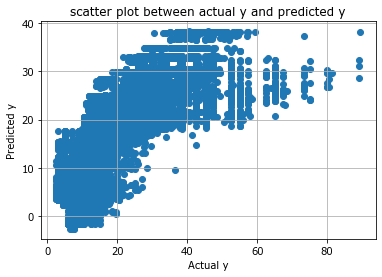

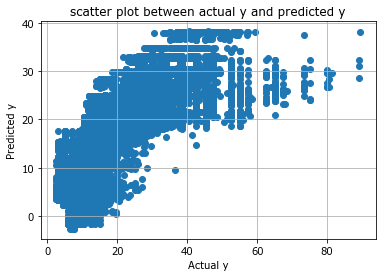

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



#trying a very simple model, bad model
cleaned_data = pd.read_csv("data/cleaned.csv")
y = cleaned_data['price']
X = cleaned_data[['distance', 'ride_class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)
print("Train set R^2: "+str(model.score(X_train, y_train)))
print("Test set R^2: "+str(model.score(X_test, y_test)))

print("Train set MSE: "+str(mean_squared_error(model.predict(X_train), y_train)))
print("Test set MSE: "+str(mean_squared_error(model.predict(X_test), y_test)))

plt.scatter(y_test,model.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()

scaler = preprocessing.StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

clf_ = SGDRegressor()
clf_.fit(x_train, y_train)
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [2]:
pipeline = Pipeline([
    ('reg', SGDRegressor()),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'reg__alpha': [0.0001,0.,0.0002,0.0005,0.004,0.005,0.006,0.007],
    'reg__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'reg__penalty': ['l2', 'l1', 'elasticnet']
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f' % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(X_test)


0 params - {'reg__alpha': 0.0001, 'reg__loss': 'squared_loss', 'reg__penalty': 'l2'}; mean - -30.80; std - 0.24
1 params - {'reg__alpha': 0.0001, 'reg__loss': 'squared_loss', 'reg__penalty': 'l1'}; mean - -30.81; std - 0.22
2 params - {'reg__alpha': 0.0001, 'reg__loss': 'squared_loss', 'reg__penalty': 'elasticnet'}; mean - -30.81; std - 0.27
3 params - {'reg__alpha': 0.0001, 'reg__loss': 'huber', 'reg__penalty': 'l2'}; mean - -35.26; std - 0.31
4 params - {'reg__alpha': 0.0001, 'reg__loss': 'huber', 'reg__penalty': 'l1'}; mean - -35.32; std - 0.23
5 params - {'reg__alpha': 0.0001, 'reg__loss': 'huber', 'reg__penalty': 'elasticnet'}; mean - -35.26; std - 0.16
6 params - {'reg__alpha': 0.0001, 'reg__loss': 'epsilon_insensitive', 'reg__penalty': 'l2'}; mean - -34.80; std - 0.24
7 params - {'reg__alpha': 0.0001, 'reg__loss': 'epsilon_insensitive', 'reg__penalty': 'l1'}; mean - -34.92; std - 0.67
8 params - {'reg__alpha': 0.0001, 'reg__loss': 'epsilon_insensitive', 'reg__penalty': 'elasticn